# Regressão Logística com Regularização

Nesta parte do trabalho, será implementada a Regressão Logística regularizada
para prever se os microchips de uma usina de fabricação passam na garantia
de qualidade (QA). Durante a QA, cada microchip passa por vários testes para
garantir se está funcionando corretamente. Suponha que o gerente de
produto da fábrica tem o resultados de teste para alguns microchips em
dois testes diferentes. A partir desses dois testes, se quer determinar
se os microchips deveriam ser aceitos ou rejeitados. Para ajudar a tomar
a decisão, existe um conjunto de dados de resultados de testes anteriores
sobre microchips, a partir do qual se pode construir um modelo de regressão
Logística.

## Visualização dos Dados
Implementação de um script em Python que produza um gráfico de
dispersão (scatter plot ) dos dados fornecidos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures

def carregar(file, delimeter):
    dados = np.loadtxt(file, delimiter=delimeter)
    print('Dimensoes: ',dados.shape)
    print(dados[1:6,:])
    return(dados)


dados2 = carregar("C:\\Users\\Flavio\\Downloads\\AprendizadoMaquina\\T2\\ex2data2.txt", ',')

Dimensoes:  (118, 3)
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


In [2]:
y = np.c_[dados2[:,2]]
X = dados2[:,0:2]


In [3]:
def plotar(dados, label_x, label_y, label_pos, label_neg, axes=None):
    neg = dados[:,2] == 0
    pos = dados[:,2] == 1
    
    if axes == None:
        axes = plt.gca()
    axes.scatter(dados[pos][:,0], dados[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(dados[neg][:,0], dados[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

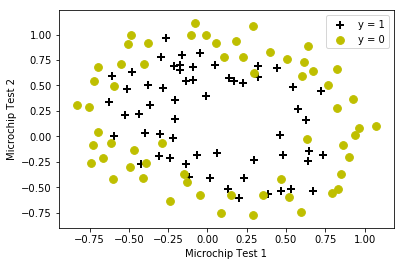

In [4]:
%matplotlib inline
plotar(dados2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

## Mapeamento de características (feature mapping)

Uma maneira de tornar os dados mais apropriados para a classificação é criar
mais características a partir das já existentes. Para isso, se deve criar uma
função mapFeature. Essa função é implementada em um arquivo de
nome mapFeature.py, que irá mapear as características para todos os termos
polinomiais de x1 e x2, até a sexta potência.

In [5]:
# Inserindo a coluna com 1s
poly = PolynomialFeatures(6)
XX = poly.fit_transform(dados2[:,0:2])
XX.shape

%run -i "mapFeature.py"

## Função de custo e gradiente

Agora, será implementado o código para calcular a função de custo e
o gradiente para a regressão logística regularizada. O arquivo de nome
costFunctionReg.py contém uma função de nome costFunctionReg.py
e que computa o custo e o gradiente, conforme mostrado abaixo:

In [6]:
%run -i "sigmoide.py"

"""
def sigmoide(z):
    return 1. / (1+np.exp(-z))
"""

'\ndef sigmoide(z):\n    return 1. / (1+np.exp(-z))\n'

In [7]:
def costFunctionReg(theta, reg, *args):
    m = y.size
    h = sigmoide(XX.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

Nas próximas partes do exercício, será implementada a regressão logística regularizada sobre os dados fornecidos e também será visto como a regularização pode
ajudar a combater o problema do sobreajuste.

## Função de custo e gradiente

Agora, será implementado o código para calcular a função de custo e
o gradiente para a regressão logística regularizada. Será criado um arquivo de nome
costFunctionReg.py que contém uma função de nome costFunctionReg.py
e que computa o custo e o gradiente.

In [9]:
%run -i "costFunctionReg.py"

def gradientReg(theta, reg, *args):
    m = y.size
    h = sigmoide(XX.dot(theta.reshape(-1,1)))
      
    grad = (1/m)*XX.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

def predict(theta, X, threshold=0.5):
    p = sigmoide(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

Depois de concluir a implementação da função costFunctionReg, deve se testar a corretude dela usando o valor inicial de θ (inicializado todo com zeros).
O custo é de cerca de 0;693.
Por fim, usando a função costFunctionReg, agora se deve computar os valores ótimos para θ.

In [10]:
initial_theta = np.zeros(XX.shape[1])
costFunctionReg(initial_theta, 1, XX, y)

0.69314718055994529

##  Esboço da fronteira de decisão
Nessa parte, se deve plotar a fronteira de decisão que foi aprendida
para separar os exemplos positivos dos negativos. 

costFunctionReg.py:2: RuntimeWarning: overflow encountered in exp
  m = y.size


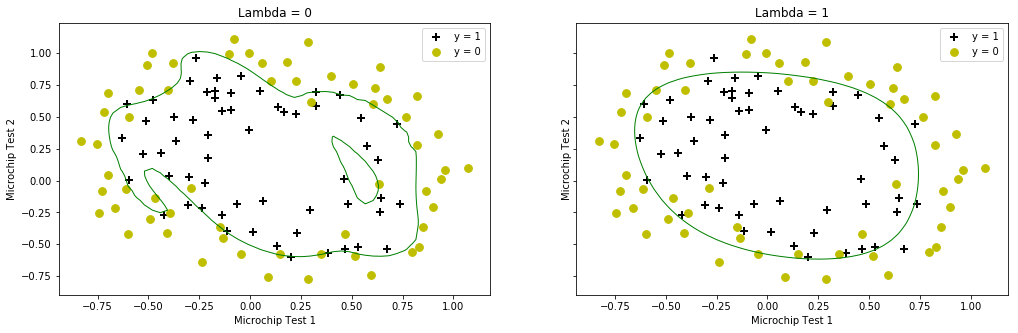

In [11]:
fig, axes = plt.subplots(1,2, sharey = True, figsize=(17,5))

"""
Serão gerados dois gráficos com a fronteira de decisão que foi aprendida
para separar os exemplos positivos dos negativos.

Fronteiras de decisão:
Sem regularização: Lambda = 0 
Regularizado com Lambda = 1 
"""
for i, C in enumerate([0,1]):
    # Valores ótimos da função costFunctionReg
    res2 = minimize(costFunctionReg, initial_theta, args=(C, XX, y), method=None, jac=gradientReg, options={'maxiter':3000})
    
    # Acurácia (precisão)
    accuracy = 100*sum(predict(res2.x, XX) == y.ravel())/y.size    

    # Scatter plot of X,y
    plotar(dados2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0',axes.flatten()[i])
    
    # Plot decisionboundary
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoide(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
    h = h.reshape(xx1.shape)
    plt.clabel(cs, inline=1, fontsize=10, fmt='Decision Boundary')

    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
    axes.flatten()[i].set_title('Lambda = {}'.format(C))



## Regressão Linear com Regularização
Na primeira metade desta parte, será implementada a regressão linear com
regularização para prever a quantidade de água fluindo de uma barragem usando
a mudança do nível da água em um reservatório. Na próxima metade, serão
realizados diagnósticos dos algoritmos de aprendizado por meio de depuração e
examinados os efeitos de viés (bias) e da variância (variance).

### Visualização dos Dados

In [12]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.io import loadmat
from scipy.optimize import minimize

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [13]:
matriz = loadmat("C:\\Users\\Flavio\\Downloads\\AprendizadoMaquina\\T2\\ex5data1.mat")
#data.keys()
y_train = matriz['y']
X_train = np.c_[np.ones_like(matriz['X']), matriz['X']]

yval = matriz['yval']
Xval = np.c_[np.ones_like(matriz['Xval']), matriz['Xval']]


print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Xval:', Xval.shape)
print('yval:', yval.shape)

X_train: (12, 2)
y_train: (12, 1)
Xval: (21, 2)
yval: (21, 1)


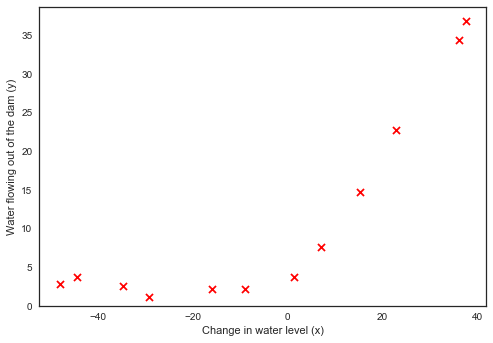

In [14]:
plt.scatter(X_train[:,1], y_train, s=50, c='r', marker='x', linewidths=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.ylim(ymin=0);

### Função de custo da regressão linear regularizada

A tarefa a seguir é escrever uma função para calcular a função de custo da regressão
linear regularizada. Quando completada a implementação, a corretude da sua função de custo é verificada usando theta inicializado com (1; 1). 
Deve se esperar ver uma saída de 303,993.

In [41]:
%run -i "linearRegCostFunction.py"


initial_theta = np.ones((X_train.shape[1],1))
cost = linearRegCostFunction(initial_theta, X_train, y_train, 0)

print("Com theta inicializado com (1; 1), a função de custo da regressão linear regularizada retorna ",cost)


Com theta inicializado com (1; 1), a função de custo da regressão linear regularizada retorna  303.951525554


### Gradiente na regressão linear regularizada


In [16]:
gradient = lrgradientReg(initial_theta, X_train, y_train, 0)
print("Com theta inicializado com (1; 1), o gradiente é ", gradient)

Com theta inicializado com (1; 1), o gradiente é  [ -15.30301567  598.16741084]


### Ajustando os parâmetros da regressão linear

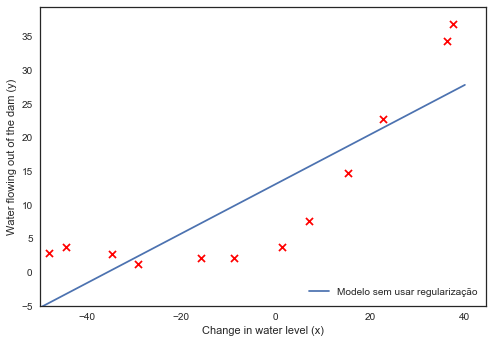

In [17]:
def trainLinearReg(X, y, reg):
    theta_inicial = np.array([[15],[15]]) #bizarro, minimize() não converge com theta(0,0)...
    res = minimize(linearRegCostFunction, theta_inicial, args=(X,y,reg), method=None, jac=lrgradientReg, options={'maxiter':5000})
    return(res)

ajuste = trainLinearReg(X_train, y_train, 0)

plt.plot(np.linspace(-50,40), (ajuste.x[0]+ (ajuste.x[1]*np.linspace(-50,40))), label='Modelo sem usar regularização')
plt.scatter(X_train[:,1], y_train, s=50, c='r', marker='x', linewidths=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.ylim(ymin=-5)
plt.xlim(xmin=-50)
plt.legend(loc=4);

## Viés-Variância

Um conceito importante no Aprendizado de Máquina é o relacionamento entre
o viés (bias) e a variância (variance) de um modelo de aprendizado. 

Nesta parte do trabalho, serão produzidos gráficos dos erros de treinamento e teste na forma de curvas de aprendizado para diagnosticar problemas de Viés-Variância.

### Curvas de Aprendizado

Agora será implementado um código para gerar as curvas de aprendizado que
serão úteis na depuração de algoritmos de aprendizagem.

In [18]:
%run -i "learningCurve.py"
t_error, v_error = learningCurve(X_train, y_train, Xval, yval, 0)

### Figura 5:

### Curva de aprendizado para a regressão linear.

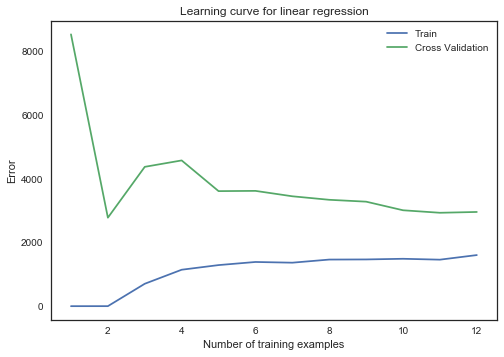

In [19]:
plt.plot(np.arange(1,13), t_error, label='Train')
plt.plot(np.arange(1,13), v_error, label='Cross Validation')
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend();

Na curva acima, se observa que os erros de treinamento e de validação cruzada são ambos altos quando o número de exemplos
de treinamento é aumentado. Isso reflete o viés alto do modelo (o modelo de regressão linear é muito simples e não consegue se ajustear bem ao conjunto de dados). Na próxima seção, será implementada regressão polinomial para ajustar um modelo melhor a este conjunto de dados.

### Regressão Polinomial

O problema do modelo linear é que ele é muito simples para os dados e
resultou em subajuste (viés alto). Nesta parte, esse problema será resolvido
adicionando mais características. 

In [35]:
%run -i "polyFeatures.py"

### Regressão Polinomial - aprendizado

Depois de ter completado polyFeatures.py, deve-se treinar um modelo de
regressão polinomial usando a função de custo da regressão linear.

Ainda estamos resolvendo um problema de otimização de regressão linear. Portanto, ainda se precisa aplicar a normalização de
características. Portanto, antes de aprender os parâmetros para a regressão
polinomial, se deve normalizar as características do conjunto de treinamento,
e armazenar os parametros mu e sigma.

In [36]:
p = 8
m = X.shape[0]
X_test = matriz['Xtest']
X_val = matriz['Xval']
y = matriz['y'].ravel()
y_test = matriz['ytest'].ravel()
y_val = matriz['yval'].ravel()
m_test = X_test.shape[0]
m_val = X_val.shape[0]
%run -i "normalizarCaracteristica.py"

X_poly = polyFeatures(X, p)
X_poly, mu, sigma = normalizarCaracteristica(X_poly)
X_poly = np.hstack((np.ones((m, 1)), X_poly))

X_poly_test = polyFeatures(X_test, p)
X_poly_test, dummy_mu, dummy_sigma = normalizarCaracteristica(X_poly_test, mu, sigma)
X_poly_test = np.hstack((np.ones((m_test, 1)), X_poly_test))

X_poly_val = polyFeatures(X_val, p)
X_poly_val, dummy_mu, dummy_sigma = normalizarCaracteristica(X_poly_val, mu, sigma)
X_poly_val = np.hstack((np.ones((m_val, 1)), X_poly_val))

print ('Exemplo de Treino normalizado 1:')
print (X_poly[0, :])



Exemplo de Treino normalizado 1:
[ 1.         -0.00710129  0.99791805 -0.98977681  0.66359293 -0.21829255
  0.61587084 -0.58801313  0.2439574  -0.24294194  0.17403955 -0.40598636
 -0.02886215 -0.23180187 -0.06697    -0.30185289 -0.15515712]


Depois de aprender os parâmetros θ, se deve gerar dois gráficos gerados com a regressão polinomial
com λ = 0.